In [26]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
pd.set_option('display.max_columns', 500)

In [27]:
data=pd.read_csv("C:/Coding Codingan/GENERASI GIGIH/Mid Term/backloggd_games.csv")

<h1 style="color:red;">My main goal is to deliver information about the game titles along with their corresponding quantitative scores. Other columns thats not related may only serve as additional information<h1>

# Base Information --------------------------------

- Title - Title of the game

- Release_Date - Release date of the game

-  Developers - Companies/Developers of the game

-    Summary - Summary of the game

-    Platforms - Platforms of the game

-    Genres - Game genres

-    Rating - Rating of the game from 0 to 5

-    Plays - Number of plays that the game has

-    Playing - Number of people playing the game

-    Backlogs - Number of people who own the game but haven't played it

-    Wishlist - Number of times the game has been wishlisted

-    Lists - Number of times the game has been mentioned in a game list

-    Reviews - Number of user reviews about the game




# EDA + Cleansing

In [28]:
data.shape

(60000, 14)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [30]:
data.isnull().sum()

Unnamed: 0          0
Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

In [31]:
#TBD (To Be Decided)
data[data["Release_Date"]=="TBD"]

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
634,634,Hades II,TBD,['Supergiant Games'],Battle beyond the Underworld using dark sorcer...,['Windows PC'],"['Adventure', 'Indie', 'RPG']",NaN,16,3,659,1.9K,181,1
798,798,Deltarune,TBD,['tobyfox'],"UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Windows PC', 'Mac', 'PlayStation 4', 'Ninten...","['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",4.3,1.8K,109,634,810,389,96
807,807,Metal Gear Solid Delta: Snake Eater,TBD,['Konami'],"The same gripping story and engrossing world, ...","['Windows PC', 'PlayStation 5', 'Xbox Series']","['Adventure', 'Shooter', 'Tactical']",NaN,11,1,134,589,93,8
853,853,Silent Hill 2,TBD,"['Konami', 'Bloober Team']",Experience a master-class in psychological sur...,"['Windows PC', 'PlayStation 5']","['Adventure', 'Puzzle']",NaN,104,1,377,1.1K,163,11
950,950,Phantom Blade 0,TBD,['S-Game'],Phantom Blade Zero is a an action RPG featurin...,"['Windows PC', 'PlayStation 5']","['Adventure', 'Brawler', 'RPG']",NaN,2,1,68,413,67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59988,59988,Cue Breakers,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0
59989,59989,Mega Brain Boost,TBD,['Majesco Entertainment'],NaN,[],[],NaN,0,0,0,0,0,0
59990,59990,Popcorn!,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0
59992,59992,Trace 2,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0


In [32]:
data.duplicated().sum()

0

#### - few columns with "[]" (empty bracket) value, indicates the columns has no values or you could probably said unknown.
#### - some titles have duplicate values

In [33]:

pd.set_option('display.max_rows', 110)
data[ (data["Developers"]=="[]") & (data["Platforms"]=="[]")  &   (data["Genres"]=="[]")    ].tail(10)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
59804,59804,DogFight Simulator,TBD,[],NaN,[],[],NaN,1,0,0,0,0,0
59814,59814,Mooncake Shop,TBD,[],NaN,[],[],NaN,0,0,0,1,0,0
59816,59816,Trainz Simulator 2009,TBD,[],"Trainz Simulator 2009: World Builder Edition, ...",[],[],NaN,1,0,0,0,0,0
59824,59824,Forever With You,TBD,[],NaN,[],[],NaN,0,0,0,1,0,0
59894,59894,Busin 0: Wizardry Alternative Neo,TBD,[],An Atlus published PlayStation 2 exclusive RPG...,[],[],NaN,2,0,14,19,10,0
59968,59968,Popeye Arcade Game,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0
59976,59976,Bug Hunt,TBD,[],"Bug Hunt (Atari Corp, 1987) was a light gun ga...",[],[],NaN,1,0,0,0,0,0
59988,59988,Cue Breakers,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0
59990,59990,Popcorn!,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0
59992,59992,Trace 2,TBD,[],NaN,[],[],NaN,0,0,0,0,0,0


In [34]:

for i in data.columns:
    print(f"{data[i].value_counts()}\n")


Unnamed: 0
0        1
40004    1
39992    1
39993    1
39994    1
        ..
20004    1
20005    1
20006    1
20007    1
59999    1
Name: count, Length: 60000, dtype: int64

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

Release_Date
TBD             8019
Dec 31, 2023     355
Dec 31, 1995     219
Dec 31, 1994     200
Dec 31, 1983     189
                ... 
D

#### - Dropping some columns that are not necessary and has no function at all ["Unnamed: 0", "Summary"]. Because its not related to the metrics score


In [35]:
#Dropping some columns that are not necessary.

data.drop(columns=["Unnamed: 0", "Summary"],inplace=True,axis=1)

In [36]:
# Droppimg duplicates on titles 
data.drop_duplicates(subset=["Title"],inplace=True)

#### - columns that crucial to score metrics have wrong data types ["Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews"]

In [37]:
# few columns have wrong data types ["Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40985 entries, 0 to 59996
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         40985 non-null  object 
 1   Release_Date  40985 non-null  object 
 2   Developers    40985 non-null  object 
 3   Platforms     40985 non-null  object 
 4   Genres        40985 non-null  object 
 5   Rating        19370 non-null  float64
 6   Plays         40985 non-null  object 
 7   Playing       40985 non-null  object 
 8   Backlogs      40985 non-null  object 
 9   Wishlist      40985 non-null  object 
 10  Lists         40985 non-null  object 
 11  Reviews       40985 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.1+ MB


#### - Creating a function to convert scores represented as strings with 'K' to integers, multiplying them by 1000, and 'M' to integers, multiplying them by 1000000.

In [38]:


def changing_types(col):
    if isinstance(col, str) and "K" in col:
        col = col.replace("K", "")
        col = float(col)
        return int(col * 1000)
    elif isinstance(col, str) and "M" in col:
        col = col.replace("M", "")
        col = float(col)
        return int(col * 1000000)
    else:
        return int(col)

cols = ["Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews"]

for col in cols:
    data[col] = data[col].apply(changing_types)
    
data

,Title,Release_Date,Developers,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4100,5600,5500,4600,3000
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,3100,5600,3000,5100,3000
2,Hades,"Dec 07, 2018",['Supergiant Games'],"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,3500,7300,4000,3200,2100
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,2700,9600,2600,3400,2100
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728,5700,2100,3900,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],[],[],NaN,0,0,0,0,0,0
59993,No Country for Old Men,TBD,[],[],"['Indie', 'RPG', 'Simulator', 'Strategy']",NaN,0,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",['Neo Kuriyo'],['Windows PC'],[],NaN,1,0,0,2,0,0
59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


#### - changing "[]" or empty brackey with no value into "Unknown" and removing [] from rows

In [39]:
#  changing "[]" or empty column into "Unknown" 
cols=["Developers","Platforms","Genres"]

for i in cols:
    data[i]=data[i].str.replace("['", "").str.replace("']", "")
    data[i]=data[i].str.replace("[]", "Unknown")
    data[i]=data[i].str.replace("'", "")



In [40]:
#much better
data[["Developers","Platforms","Genres"]]

,Developers,Platforms,Genres
0,"FromSoftware, Bandai Namco Entertainment","Windows PC, PlayStation 4, Xbox One, PlayStati...","Adventure, RPG"
1,"Nintendo, Nintendo EPD Production Group No. 3","Wii U, Nintendo Switch","Adventure, Puzzle"
2,Supergiant Games,"Windows PC, Mac, PlayStation 4, Xbox One, Play...","Adventure, Brawler, Indie, RPG"
3,Team Cherry,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform"
4,"tobyfox, 8-4","Windows PC, Mac, Linux, PlayStation 4, Xbox On...","Adventure, Indie, RPG, Turn Based Strategy"
...,...,...,...
59992,Unknown,Unknown,Unknown
59993,Unknown,Unknown,"Indie, RPG, Simulator, Strategy"
59994,Neo Kuriyo,Windows PC,Unknown
59995,"FHNBHJ, indienova",Windows PC,RPG


#### - Narrowing the Platforms Category into Two Divisions: Windows PC and Consoles. We acknowledge that the platform war will primarily revolve around Windows PC and consoles.

In [41]:



def narrowing(platform):
    if "Unknown" in platform:
        return "Unknown"
    elif "Windows PC" not in platform:
        return "Consoles Exclusive "
    else:
        return "Windows PC"

data["Platforms"]= data["Platforms"].apply(narrowing)

data["Platforms"]




0                 Windows PC
1        Consoles Exclusive 
2                 Windows PC
3                 Windows PC
4                 Windows PC
                ...         
59992                Unknown
59993                Unknown
59994             Windows PC
59995             Windows PC
59996    Consoles Exclusive 
Name: Platforms, Length: 40985, dtype: object

In [42]:
# Dropping unknown title game that already has score metrics 
data[data["Title"] == "Untitled FromSoftware Game"]
data.drop(data[data["Title"] == "Untitled FromSoftware Game"].index, axis=0,inplace=True)

#### - vizualization of platforms based on the data itself (after narrowing down)
#### - Based on data Windows pc took the first place in the platform game

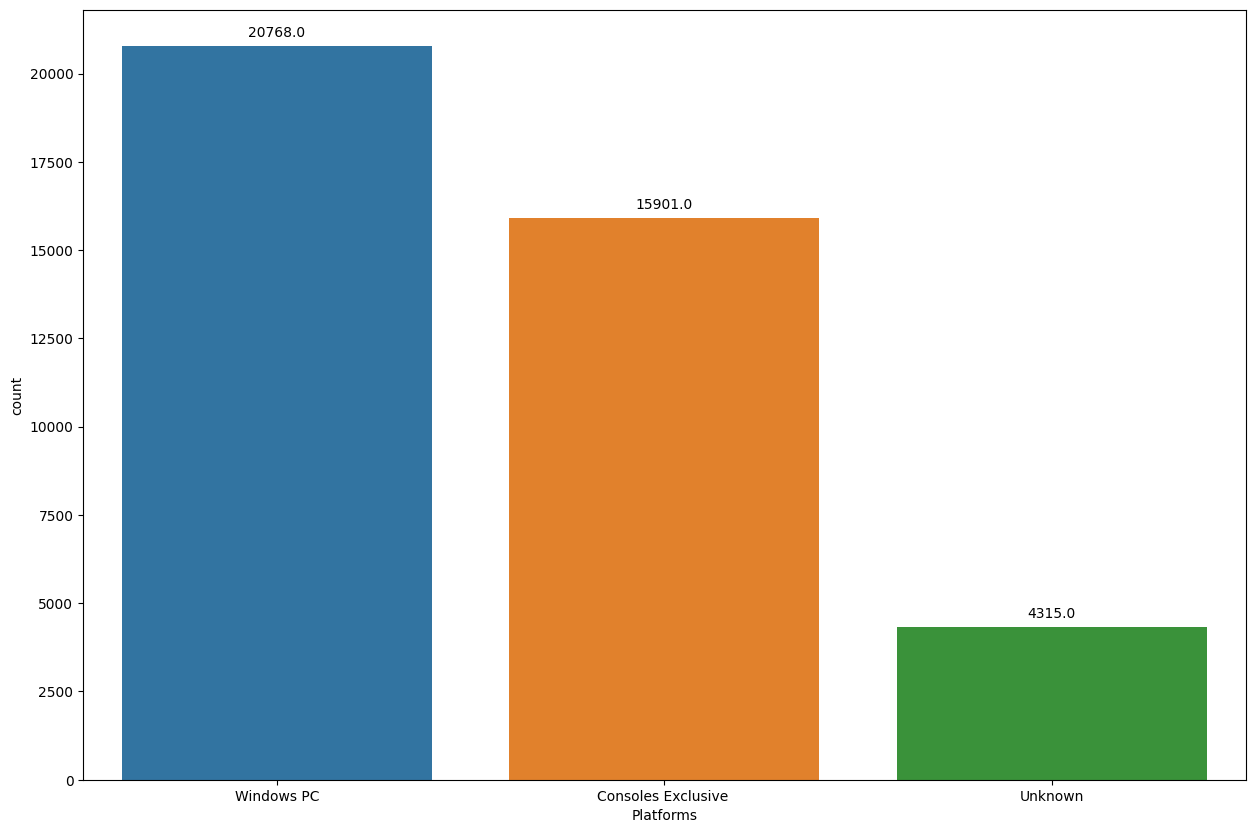

In [43]:

platform_counts=data["Platforms"].value_counts()
plt.figure(figsize=(15, 10))
dsa=sns.countplot(x=data["Platforms"])
for p in dsa.patches:
    dsa.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()


#### -  vizualization of generes (Adventure genere games is the highest among all)

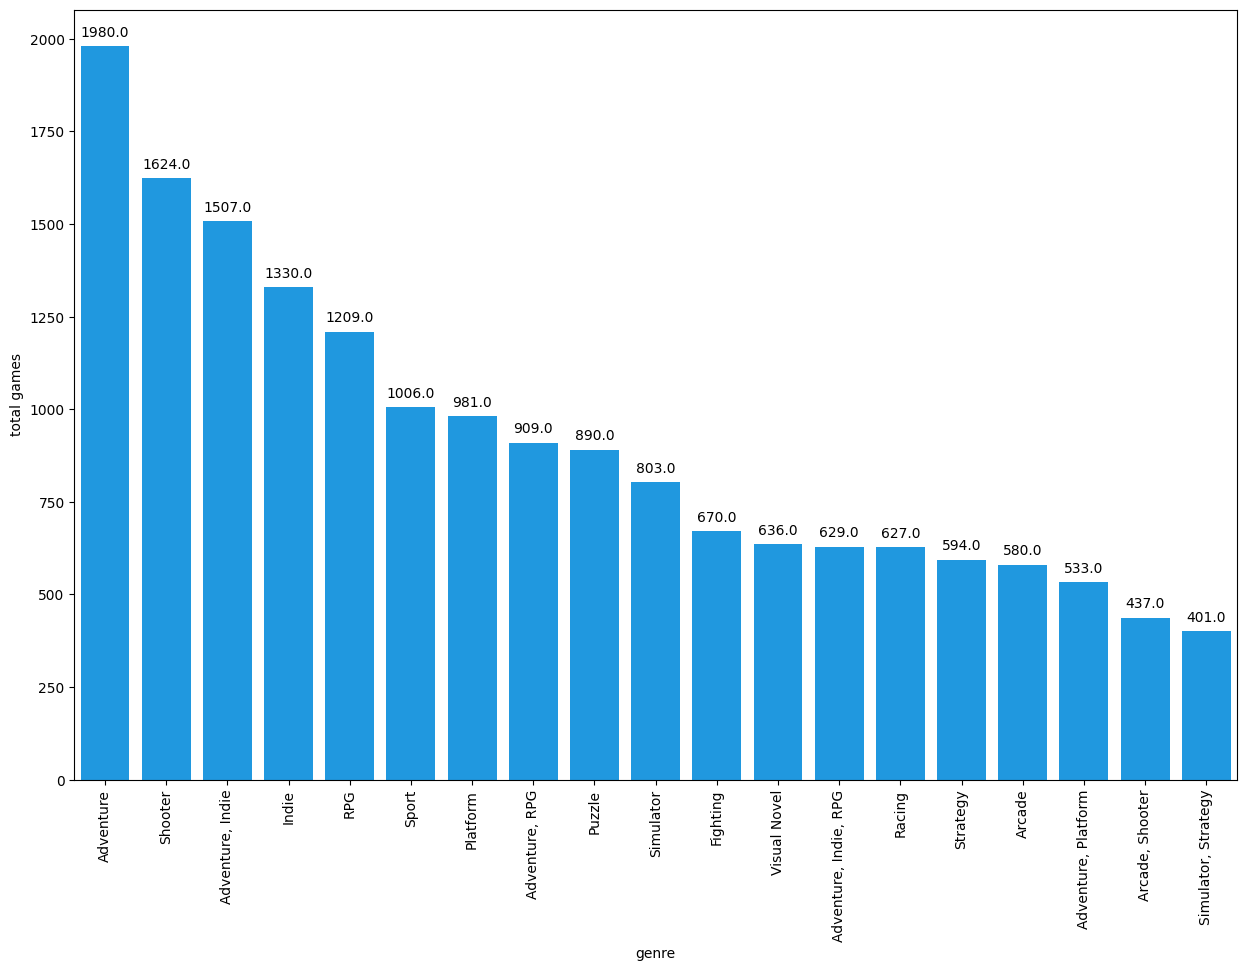

In [44]:

# Calculating genre counts
genre_counts = data['Genres'].value_counts()
# Selecting the top 20 genres (Exclude TBD)
# the number one genre counts is always TBD because so many games are not released yet (based on this data) so i exlude TBD
top_20_genres = genre_counts[1:20]


plt.figure(figsize=(15, 10))
dsa=sns.barplot(x=top_20_genres.index, y=top_20_genres.values, color='#00A0FF')
plt.xlabel('genre')
plt.ylabel('total games')
plt.xticks(rotation=90)
for p in dsa.patches:
    dsa.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.show()



#### finding how many games released by year (the peak of year that produce many games is  the year between 2010 and 2020)

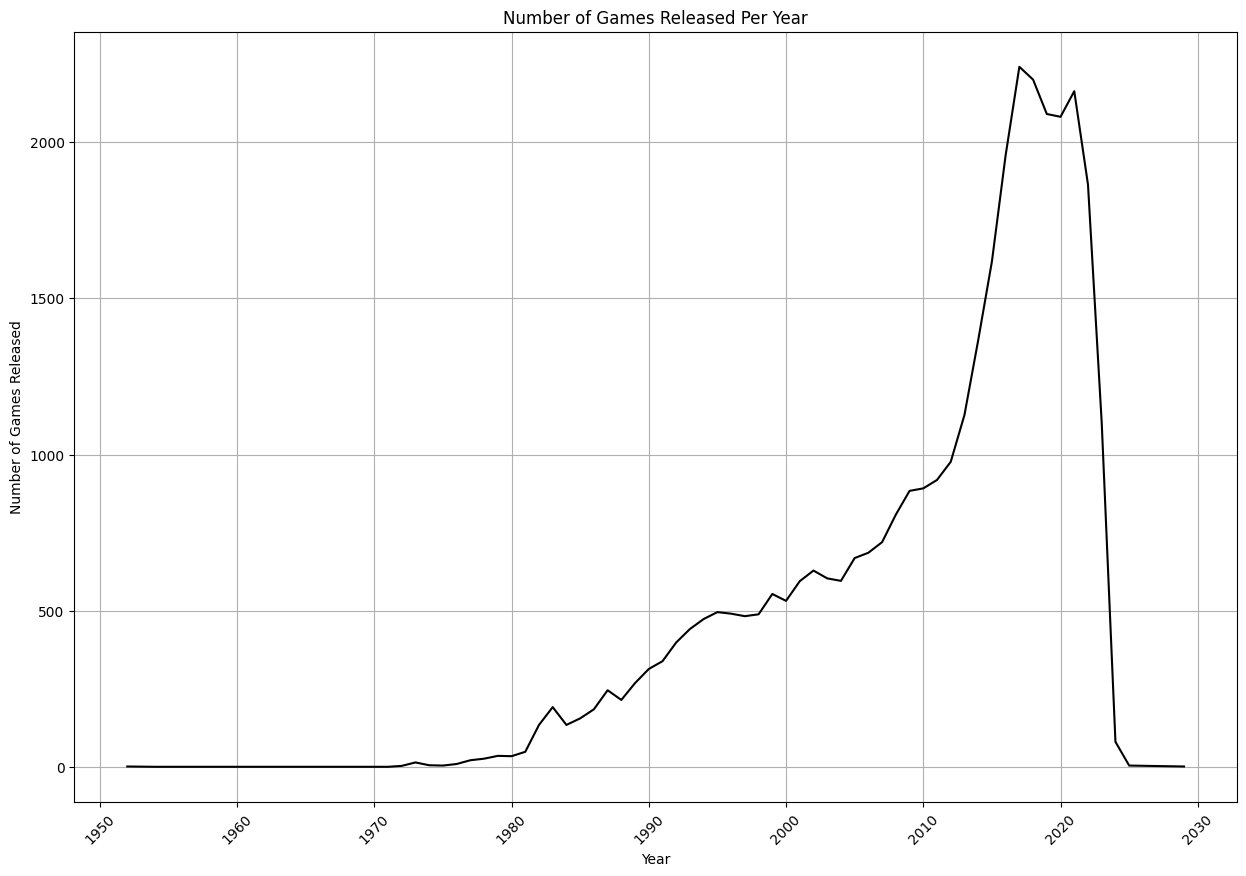

In [45]:

time=data.copy()
time['Release_Date'] = time['Release_Date'].replace('TBD', np.nan)
time['Release_Date'] = pd.to_datetime(time['Release_Date'], format="%b %d, %Y")
time['Year'] = time['Release_Date'].dt.year

games_released_per_year = time.groupby('Year').size()
plt.figure(figsize=(15, 10))
games_released_per_year.plot(kind='line', linestyle='-', color='black')  # Adding marker and line style
plt.title("Number of Games Released Per Year")
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True) 
plt.xticks(rotation=45)  
plt.show()

In [46]:
data[data["Rating"].isnull()]


,Title,Release_Date,Developers,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
526,Final Fantasy XVI,"Jun 22, 2023",Square Enix,Windows PC,RPG,NaN,83,83,1200,3100,509,11
634,Hades II,TBD,Supergiant Games,Windows PC,"Adventure, Indie, RPG",NaN,16,3,659,1900,181,1
660,Hollow Knight: Silksong,"Dec 31, 2023",Team Cherry,Windows PC,"Adventure, Indie, Platform",NaN,98,8,1300,4000,331,16
663,Armored Core VI: Fires of Rubicon,"Aug 25, 2023","Bandai Namco Games, FromSoftware",Windows PC,Adventure,NaN,8,5,401,1200,248,0
688,Persona 3 Reload,"Dec 31, 2024","Sega, Atlus",Windows PC,RPG,NaN,13,1,283,1100,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59991,尺子和橡皮,"May 11, 2018",Unknown,Windows PC,"Indie, Simulator",NaN,0,0,0,0,0,0
59992,Trace 2,TBD,Unknown,Unknown,Unknown,NaN,0,0,0,0,0,0
59993,No Country for Old Men,TBD,Unknown,Unknown,"Indie, RPG, Simulator, Strategy",NaN,0,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",Neo Kuriyo,Windows PC,Unknown,NaN,1,0,0,2,0,0


#### -  Making func to fill the null rating based on the game released 
#### - if it is  TBD (To Be Decided) and rating column is null i filled it with 0

In [47]:


def filling(row):
    if row["Release_Date"] == "TBD" and pd.isna(row["Rating"]):
        return 0
    else:
        return row["Rating"]



# Apply the filling function based on the conditions from 'Release_Date' and 'Rating'
data["Rating"] = data.apply(filling, axis=1)
#still have null for game that already released and i have to filled it with mean bcs its a continouse value 
data["Rating"].fillna(data["Rating"].mean(),inplace=True)

# For the dashboard all the metrics shoule be enough to be displayed, because my goal is to provide information to the audience about game titles along with their assessment metrics.

In [48]:
data

,Title,Release_Date,Developers,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","FromSoftware, Bandai Namco Entertainment",Windows PC,"Adventure, RPG",4.500000,21000,4100,5600,5500,4600,3000
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","Nintendo, Nintendo EPD Production Group No. 3",Consoles Exclusive,"Adventure, Puzzle",4.400000,35000,3100,5600,3000,5100,3000
2,Hades,"Dec 07, 2018",Supergiant Games,Windows PC,"Adventure, Brawler, Indie, RPG",4.300000,25000,3500,7300,4000,3200,2100
3,Hollow Knight,"Feb 24, 2017",Team Cherry,Windows PC,"Adventure, Indie, Platform",4.400000,25000,2700,9600,2600,3400,2100
4,Undertale,"Sep 15, 2015","tobyfox, 8-4",Windows PC,"Adventure, Indie, RPG, Turn Based Strategy",4.200000,32000,728,5700,2100,3900,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,Unknown,Unknown,Unknown,0.000000,0,0,0,0,0,0
59993,No Country for Old Men,TBD,Unknown,Unknown,"Indie, RPG, Simulator, Strategy",0.000000,0,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",Neo Kuriyo,Windows PC,Unknown,2.432116,1,0,0,2,0,0
59995,Dragon Spirits,"Apr 25, 2023","FHNBHJ, indienova",Windows PC,RPG,2.432116,2,0,1,5,3,0


In [49]:
data.to_csv('data_mid_term.csv', index=False)

In [52]:
!jupyter nbconvert --to html midterm.ipynb

[NbConvertApp] Converting notebook midterm.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 543989 bytes to midterm.html
